In [2]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TRAIN_DIR = 'C:/Users/User/Downloads/Assignment/CIFAR-10-images-master/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
class_num = CATEGORIES.index(c)
print(class_num)

9


In [5]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:30<00:00, 161.32it/s]

50000


In [6]:
print(TRAIN_DATA)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



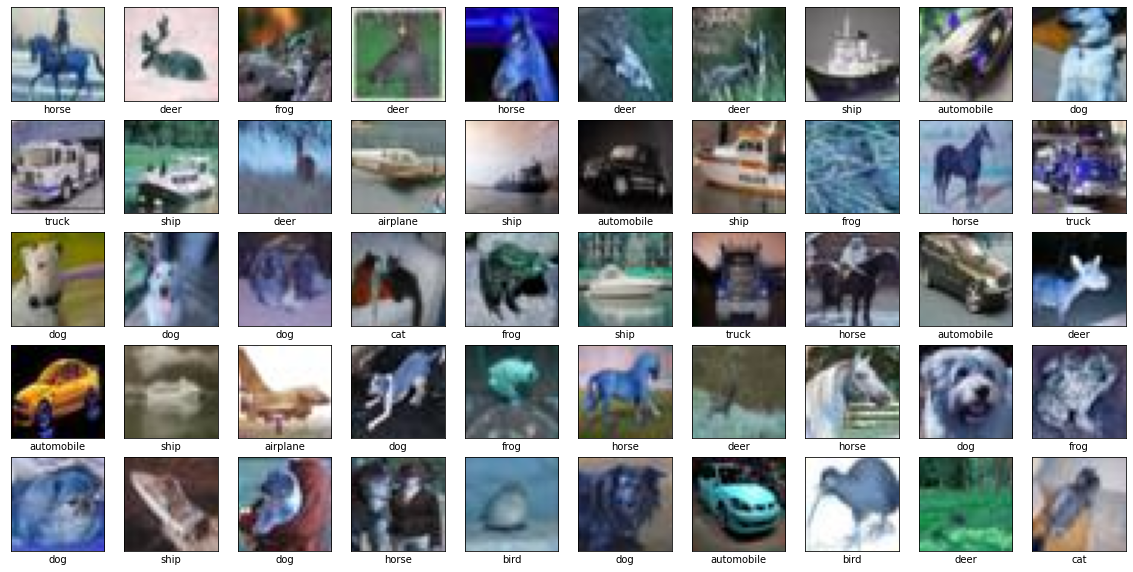

In [7]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [8]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [ ]:
import math 
for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0

        scores1 = []
        scores2 = []
        for v in validation:
            for t in train:
                l2_dist = np.sum(np.sqrt(t[0]**2-v[0]**2))
                scores1.append([l2_dist,t[1]])
                
                l1_dist = np.sum(t[0]-v[0])
                scores2.append([l1_dist,t[1]])
            sorted_scores1 = sorted(scores1, key=lambda a: a[0])
            sorted_scores2 = sorted(scores2, key=lambda a: a[0])
            print(sorted_scores2)
            
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f1+f0+f3+f4
        validation = f2
    elif i==3:
        train = f1+f2+f0+f4
        validation = f3
    elif i==4:
        train = f1+f2+f3+f0
        validation = f4
    print(len(train), len(validation))